### python-CTD to convert 1 m binned CTD files (Seabird cnv) to a single csv for each station 

#### - Station 20/P2, October 2019 (Kilo Moana, KM1919)
    - The ship's CTD system did not have a dampener; we think that likely this will mess up the mixed layer data.
    - There are 34 casts from this station occupation (Oct 3-13, 2019). See my notes [here](https://docs.google.com/document/d/1IXlWi4W0qIAe801GK13snwnr3nXHDrbENhybz6lJaNA/edit#). 

#### - Downloaded Al's 'ave' cnv files from the POMZ shared drive

    - Inelegant, but added 'ignore' to the DepthSM parameter in cnv because otherwise python-ctd wasn't sure which to use as index, pressure or depth.
    
    - e.g., in line 22 of the cnv:
    
    # name 5 = depSMignore: Depth [salt water, m]

In [1]:
import io
import requests
from pathlib import Path
import seaborn as sns
import pandas as pd

import ctd
import datetime

In [3]:
# Define the starting datetimes of each cast

st25 = '2019-10-03 13:31:35'
st28 = '2019-10-04 11:01:39'
st29 = '2019-10-04 23:50:04'
st30 = '2019-10-05 08:39:43'
st31 = '2019-10-05 14:03:02'
st32 = '2019-10-05 21:38:22'
st33 = '2019-10-06 14:14:26'
st34 = '2019-10-06 19:38:21'
st35 = '2019-10-06 22:48:57'
st36 = '2019-10-07 01:47:02'
st37 = '2019-10-07 07:40:03'
st38 = '2019-10-07 16:50:08'
st39 = '2019-10-07 20:45:29'
st40 = '2019-10-08 01:04:04'
st42 = '2019-10-08 07:04:45'
st43 = '2019-10-08 13:20:29'
st44 = '2019-10-08 15:59:43'
st45 = '2019-10-08 18:55:51'
st46 = '2019-10-08 22:10:38'
st47 = '2019-10-09 01:10:36'
st48 = '2019-10-09 07:47:50'
st49 = '2019-10-09 11:32:27'
st50 = '2019-10-09 14:15:42'
st51 = '2019-10-09 19:13:01'
st52 = '2019-10-11 00:09:58'
st53 = '2019-10-11 04:49:54'
st54 = '2019-10-11 12:24:17'
st55 = '2019-10-11 19:08:20'
st56 = '2019-10-11 23:05:27'
st57 = '2019-10-12 02:30:37'
st58 = '2019-10-12 10:31:29'
st59 = '2019-10-12 13:13:32'
st60 = '2019-10-12 19:49:39'
st61 = '2019-10-13 05:08:47'

In [20]:
# read from cnv with 'ignore' added to depSM
cast25 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast25-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down25, up25 = cast25.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down25.insert(0, 'StartTime', pd.to_datetime(st25).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down25.loc[:, ('StartTime')] + pd.to_timedelta(down25.loc[:, ('timeS')], unit='s')
down25.insert(2, 'Time', time)

# save the downcast to a csv
down25.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast25.csv")

# slice the mixed layer out and save as csv
p2_25_ml = down25[down25['sigma-�00'].between(22.0,23.3)]
#p2_25_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast25_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_25_ml = p2_25_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_25_ml)

bt_mean_p2_25_ml = p2_25_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_25_ml)

o2_mean_p2_25_ml = p2_25_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_25_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_25_pcm = down25[down25['sigma-�00'].between(23.3,25.1)]
#p2_25_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast25_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_25_pcm = p2_25_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_25_pcm)

bt_mean_p2_25_pcm = p2_25_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_25_pcm)

o2_mean_p2_25_pcm = p2_25_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_25_pcm)

# slice the deep chlorophyll max out and save as csv
p2_25_dcm = down25[down25['sigma-�00'].between(25.8,26.2)]
p2_25_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast25_DCM.csv")

p2_25_dcm_max = p2_25_dcm.loc[p2_25_dcm['flECO-AFL'].idxmax()]
p2_25_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast25_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.37804375
Mixed layer mean beam attenutation: 98.39447499999997
Mixed layer mean dissolved O2: 215.77256250000005

Primary chl max mean chl fluor: 0.8587761904761907
Primary chl max mean beam atten: 98.37140952380949
Primary chl max mean dissO2: 118.25004761904763


In [22]:
# read from cnv with 'ignore' added to depSM
cast28 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast28-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down28, up28 = cast28.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down28.insert(0, 'StartTime', pd.to_datetime(st28).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down28.loc[:, ('StartTime')] + pd.to_timedelta(down28.loc[:, ('timeS')], unit='s')
down28.insert(2, 'Time', time)

# save the downcast to a csv
down28.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast28.csv")

# slice the mixed layer out and save as csv
p2_28_ml = down28[down28['sigma-�00'].between(22.0,23.3)]
#p2_28_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast28_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_28_ml = p2_28_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_28_ml)

bt_mean_p2_28_ml = p2_28_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_28_ml)

o2_mean_p2_28_ml = p2_28_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_28_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_28_pcm = down28[down28['sigma-�00'].between(23.3,28.1)]
#p2_28_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast28_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_28_pcm = p2_28_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_28_pcm)

bt_mean_p2_28_pcm = p2_28_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_28_pcm)

o2_mean_p2_28_pcm = p2_28_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_28_pcm)

# slice the deep chlorophyll max out and save as csv
p2_28_dcm = down28[down28['sigma-�00'].between(28.8,26.2)]
p2_28_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast28_DCM.csv")

#p2_28_dcm_max = p2_28_dcm.loc[p2_28_dcm['flECO-AFL'].idxmax()]
#p2_28_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast28_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.30613999999999997
Mixed layer mean beam attenutation: 98.22269333333335
Mixed layer mean dissolved O2: 219.73306666666667

Primary chl max mean chl fluor: 0.21459026217228439
Primary chl max mean beam atten: 99.23618876404493
Primary chl max mean dissO2: 21.52729962546816


In [23]:
# read from cnv with 'ignore' added to depSM
cast29 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast29-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down29, up29 = cast29.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down29.insert(0, 'StartTime', pd.to_datetime(st29).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down29.loc[:, ('StartTime')] + pd.to_timedelta(down29.loc[:, ('timeS')], unit='s')
down29.insert(2, 'Time', time)

# save the downcast to a csv
down29.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast29.csv")

# slice the mixed layer out and save as csv
p2_29_ml = down29[down29['sigma-�00'].between(22.0,23.3)]
#p2_29_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast29_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_29_ml = p2_29_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_29_ml)

bt_mean_p2_29_ml = p2_29_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_29_ml)

o2_mean_p2_29_ml = p2_29_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_29_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_29_pcm = down29[down29['sigma-�00'].between(23.3,29.1)]
#p2_29_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast29_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_29_pcm = p2_29_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_29_pcm)

bt_mean_p2_29_pcm = p2_29_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_29_pcm)

o2_mean_p2_29_pcm = p2_29_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_29_pcm)

# slice the deep chlorophyll max out and save as csv
p2_29_dcm = down29[down29['sigma-�00'].between(29.8,26.2)]
p2_29_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast29_DCM.csv")

#p2_29_dcm_max = p2_29_dcm.loc[p2_29_dcm['flECO-AFL'].idxmax()]
#p2_29_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast29_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.381
Mixed layer mean beam attenutation: 97.68753846153847
Mixed layer mean dissolved O2: 217.37423076923076

Primary chl max mean chl fluor: 0.2453594795539028
Primary chl max mean beam atten: 99.16709070631968
Primary chl max mean dissO2: 18.41473605947959


In [24]:
# read from cnv with 'ignore' added to depSM
cast30 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast30-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down30, up30 = cast30.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down30.insert(0, 'StartTime', pd.to_datetime(st30).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down30.loc[:, ('StartTime')] + pd.to_timedelta(down30.loc[:, ('timeS')], unit='s')
down30.insert(2, 'Time', time)

# save the downcast to a csv
down30.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast30.csv")

# slice the mixed layer out and save as csv
p2_30_ml = down30[down30['sigma-�00'].between(22.0,23.3)]
#p2_30_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast30_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_30_ml = p2_30_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_30_ml)

bt_mean_p2_30_ml = p2_30_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_30_ml)

o2_mean_p2_30_ml = p2_30_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_30_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_30_pcm = down30[down30['sigma-�00'].between(23.3,30.1)]
#p2_30_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast30_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_30_pcm = p2_30_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_30_pcm)

bt_mean_p2_30_pcm = p2_30_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_30_pcm)

o2_mean_p2_30_pcm = p2_30_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_30_pcm)

# slice the deep chlorophyll max out and save as csv
p2_30_dcm = down30[down30['sigma-�00'].between(30.8,26.2)]
p2_30_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast30_DCM.csv")

#p2_30_dcm_max = p2_30_dcm.loc[p2_30_dcm['flECO-AFL'].idxmax()]
#p2_30_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast30_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.31809411764705886
Mixed layer mean beam attenutation: 98.15800588235297
Mixed layer mean dissolved O2: 217.62688235294118

Primary chl max mean chl fluor: 0.11156216216216314
Primary chl max mean beam atten: 99.7147098752598
Primary chl max mean dissO2: 7.123032224532224


In [25]:
# read from cnv with 'ignore' added to depSM
cast31 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast31-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down31, up31 = cast31.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down31.insert(0, 'StartTime', pd.to_datetime(st31).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down31.loc[:, ('StartTime')] + pd.to_timedelta(down31.loc[:, ('timeS')], unit='s')
down31.insert(2, 'Time', time)

# save the downcast to a csv
down31.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast31.csv")

# slice the mixed layer out and save as csv
p2_31_ml = down31[down31['sigma-�00'].between(22.0,23.3)]
#p2_31_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast31_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_31_ml = p2_31_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_31_ml)

bt_mean_p2_31_ml = p2_31_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_31_ml)

o2_mean_p2_31_ml = p2_31_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_31_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_31_pcm = down31[down31['sigma-�00'].between(23.3,31.1)]
#p2_31_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast31_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_31_pcm = p2_31_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_31_pcm)

bt_mean_p2_31_pcm = p2_31_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_31_pcm)

o2_mean_p2_31_pcm = p2_31_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_31_pcm)

# slice the deep chlorophyll max out and save as csv
p2_31_dcm = down31[down31['sigma-�00'].between(31.8,26.2)]
p2_31_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast31_DCM.csv")

#p2_31_dcm_max = p2_31_dcm.loc[p2_31_dcm['flECO-AFL'].idxmax()]
#p2_31_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast31_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.32665
Mixed layer mean beam attenutation: 98.28781000000001
Mixed layer mean dissolved O2: 216.3209

Primary chl max mean chl fluor: 0.10597317073170857
Primary chl max mean beam atten: 99.70192375397681
Primary chl max mean dissO2: 6.390163308589612


In [26]:
# read from cnv with 'ignore' added to depSM
cast32 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast32-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down32, up32 = cast32.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down32.insert(0, 'StartTime', pd.to_datetime(st32).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down32.loc[:, ('StartTime')] + pd.to_timedelta(down32.loc[:, ('timeS')], unit='s')
down32.insert(2, 'Time', time)

# save the downcast to a csv
down32.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast32.csv")

# slice the mixed layer out and save as csv
p2_32_ml = down32[down32['sigma-�00'].between(22.0,23.3)]
#p2_32_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast32_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_32_ml = p2_32_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_32_ml)

bt_mean_p2_32_ml = p2_32_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_32_ml)

o2_mean_p2_32_ml = p2_32_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_32_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_32_pcm = down32[down32['sigma-�00'].between(23.3,32.1)]
#p2_32_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast32_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_32_pcm = p2_32_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_32_pcm)

bt_mean_p2_32_pcm = p2_32_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_32_pcm)

o2_mean_p2_32_pcm = p2_32_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_32_pcm)

# slice the deep chlorophyll max out and save as csv
p2_32_dcm = down32[down32['sigma-�00'].between(32.8,26.2)]
p2_32_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast32_DCM.csv")

#p2_32_dcm_max = p2_32_dcm.loc[p2_32_dcm['flECO-AFL'].idxmax()]
#p2_32_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast32_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.3016470588235295
Mixed layer mean beam attenutation: 97.78002352941178
Mixed layer mean dissolved O2: 218.08523529411767

Primary chl max mean chl fluor: 0.1840933184855234
Primary chl max mean beam atten: 99.42418418708236
Primary chl max mean dissO2: 13.125158129175958


In [27]:
# read from cnv with 'ignore' added to depSM
cast33 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast33-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down33, up33 = cast33.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down33.insert(0, 'StartTime', pd.to_datetime(st33).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down33.loc[:, ('StartTime')] + pd.to_timedelta(down33.loc[:, ('timeS')], unit='s')
down33.insert(2, 'Time', time)

# save the downcast to a csv
down33.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast33.csv")

# slice the mixed layer out and save as csv
p2_33_ml = down33[down33['sigma-�00'].between(22.0,23.3)]
#p2_33_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast33_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_33_ml = p2_33_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_33_ml)

bt_mean_p2_33_ml = p2_33_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_33_ml)

o2_mean_p2_33_ml = p2_33_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_33_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_33_pcm = down33[down33['sigma-�00'].between(23.3,33.1)]
#p2_33_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast33_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_33_pcm = p2_33_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_33_pcm)

bt_mean_p2_33_pcm = p2_33_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_33_pcm)

o2_mean_p2_33_pcm = p2_33_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_33_pcm)

# slice the deep chlorophyll max out and save as csv
p2_33_dcm = down33[down33['sigma-�00'].between(33.8,26.2)]
p2_33_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast33_DCM.csv")

#p2_33_dcm_max = p2_33_dcm.loc[p2_33_dcm['flECO-AFL'].idxmax()]
#p2_33_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast33_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.27104999999999996
Mixed layer mean beam attenutation: 98.28907857142858
Mixed layer mean dissolved O2: 217.37164285714283

Primary chl max mean chl fluor: 0.39564220779220743
Primary chl max mean beam atten: 99.0217428571428
Primary chl max mean dissO2: 46.98584415584416


In [28]:
# read from cnv with 'ignore' added to depSM
cast34 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast34-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down34, up34 = cast34.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down34.insert(0, 'StartTime', pd.to_datetime(st34).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down34.loc[:, ('StartTime')] + pd.to_timedelta(down34.loc[:, ('timeS')], unit='s')
down34.insert(2, 'Time', time)

# save the downcast to a csv
down34.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast34.csv")

# slice the mixed layer out and save as csv
p2_34_ml = down34[down34['sigma-�00'].between(22.0,23.3)]
#p2_34_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast34_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_34_ml = p2_34_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_34_ml)

bt_mean_p2_34_ml = p2_34_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_34_ml)

o2_mean_p2_34_ml = p2_34_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_34_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_34_pcm = down34[down34['sigma-�00'].between(23.3,34.1)]
#p2_34_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast34_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_34_pcm = p2_34_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_34_pcm)

bt_mean_p2_34_pcm = p2_34_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_34_pcm)

o2_mean_p2_34_pcm = p2_34_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_34_pcm)

# slice the deep chlorophyll max out and save as csv
p2_34_dcm = down34[down34['sigma-�00'].between(34.8,26.2)]
p2_34_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast34_DCM.csv")

#p2_34_dcm_max = p2_34_dcm.loc[p2_34_dcm['flECO-AFL'].idxmax()]
#p2_34_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast34_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.23460999999999999
Mixed layer mean beam attenutation: 97.71797999999998
Mixed layer mean dissolved O2: 217.06019999999998

Primary chl max mean chl fluor: 0.1355182648401829
Primary chl max mean beam atten: 99.31497853881282
Primary chl max mean dissO2: 11.748010654490118


In [29]:
# read from cnv with 'ignore' added to depSM
cast35 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast35-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down35, up35 = cast35.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down35.insert(0, 'StartTime', pd.to_datetime(st35).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down35.loc[:, ('StartTime')] + pd.to_timedelta(down35.loc[:, ('timeS')], unit='s')
down35.insert(2, 'Time', time)

# save the downcast to a csv
down35.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast35.csv")

# slice the mixed layer out and save as csv
p2_35_ml = down35[down35['sigma-�00'].between(22.0,23.3)]
#p2_35_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast35_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_35_ml = p2_35_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_35_ml)

bt_mean_p2_35_ml = p2_35_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_35_ml)

o2_mean_p2_35_ml = p2_35_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_35_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_35_pcm = down35[down35['sigma-�00'].between(23.3,35.1)]
#p2_35_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast35_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_35_pcm = p2_35_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_35_pcm)

bt_mean_p2_35_pcm = p2_35_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_35_pcm)

o2_mean_p2_35_pcm = p2_35_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_35_pcm)

# slice the deep chlorophyll max out and save as csv
p2_35_dcm = down35[down35['sigma-�00'].between(35.8,26.2)]
p2_35_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast35_DCM.csv")

#p2_35_dcm_max = p2_35_dcm.loc[p2_35_dcm['flECO-AFL'].idxmax()]
#p2_35_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast35_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.28569333333333335
Mixed layer mean beam attenutation: 97.59941333333333
Mixed layer mean dissolved O2: 217.2784

Primary chl max mean chl fluor: 0.10253828125000128
Primary chl max mean beam atten: 99.47189869791679
Primary chl max mean dissO2: 9.816987847222217


In [30]:
# read from cnv with 'ignore' added to depSM
cast36 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast36-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down36, up36 = cast36.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down36.insert(0, 'StartTime', pd.to_datetime(st36).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down36.loc[:, ('StartTime')] + pd.to_timedelta(down36.loc[:, ('timeS')], unit='s')
down36.insert(2, 'Time', time)

# save the downcast to a csv
down36.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast36.csv")

# slice the mixed layer out and save as csv
p2_36_ml = down36[down36['sigma-�00'].between(22.0,23.3)]
#p2_36_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast36_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_36_ml = p2_36_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_36_ml)

bt_mean_p2_36_ml = p2_36_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_36_ml)

o2_mean_p2_36_ml = p2_36_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_36_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_36_pcm = down36[down36['sigma-�00'].between(23.3,36.1)]
#p2_36_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast36_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_36_pcm = p2_36_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_36_pcm)

bt_mean_p2_36_pcm = p2_36_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_36_pcm)

o2_mean_p2_36_pcm = p2_36_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_36_pcm)

# slice the deep chlorophyll max out and save as csv
p2_36_dcm = down36[down36['sigma-�00'].between(36.8,26.2)]
p2_36_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast36_DCM.csv")

#p2_36_dcm_max = p2_36_dcm.loc[p2_36_dcm['flECO-AFL'].idxmax()]
#p2_36_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast36_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.30635333333333337
Mixed layer mean beam attenutation: 97.61823999999999
Mixed layer mean dissolved O2: 219.77519999999998

Primary chl max mean chl fluor: 0.10418183333333483
Primary chl max mean beam atten: 99.48989700000004
Primary chl max mean dissO2: 10.327590000000002


In [31]:
# read from cnv with 'ignore' added to depSM
cast37 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast37-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down37, up37 = cast37.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down37.insert(0, 'StartTime', pd.to_datetime(st37).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down37.loc[:, ('StartTime')] + pd.to_timedelta(down37.loc[:, ('timeS')], unit='s')
down37.insert(2, 'Time', time)

# save the downcast to a csv
down37.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast37.csv")

# slice the mixed layer out and save as csv
p2_37_ml = down37[down37['sigma-�00'].between(22.0,23.3)]
#p2_37_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast37_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_37_ml = p2_37_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_37_ml)

bt_mean_p2_37_ml = p2_37_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_37_ml)

o2_mean_p2_37_ml = p2_37_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_37_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_37_pcm = down37[down37['sigma-�00'].between(23.3,37.1)]
#p2_37_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast37_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_37_pcm = p2_37_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_37_pcm)

bt_mean_p2_37_pcm = p2_37_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_37_pcm)

o2_mean_p2_37_pcm = p2_37_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_37_pcm)

# slice the deep chlorophyll max out and save as csv
p2_37_dcm = down37[down37['sigma-�00'].between(37.8,26.2)]
p2_37_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast37_DCM.csv")

#p2_37_dcm_max = p2_37_dcm.loc[p2_37_dcm['flECO-AFL'].idxmax()]
#p2_37_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast37_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2562583333333333
Mixed layer mean beam attenutation: 98.04743333333333
Mixed layer mean dissolved O2: 220.53166666666667

Primary chl max mean chl fluor: 0.16277802197802171
Primary chl max mean beam atten: 99.36795406593401
Primary chl max mean dissO2: 16.191167032967044


In [32]:
# read from cnv with 'ignore' added to depSM
cast38 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast38-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down38, up38 = cast38.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down38.insert(0, 'StartTime', pd.to_datetime(st38).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down38.loc[:, ('StartTime')] + pd.to_timedelta(down38.loc[:, ('timeS')], unit='s')
down38.insert(2, 'Time', time)

# save the downcast to a csv
down38.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast38.csv")

# slice the mixed layer out and save as csv
p2_38_ml = down38[down38['sigma-�00'].between(22.0,23.3)]
#p2_38_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast38_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_38_ml = p2_38_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_38_ml)

bt_mean_p2_38_ml = p2_38_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_38_ml)

o2_mean_p2_38_ml = p2_38_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_38_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_38_pcm = down38[down38['sigma-�00'].between(23.3,38.1)]
#p2_38_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast38_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_38_pcm = p2_38_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_38_pcm)

bt_mean_p2_38_pcm = p2_38_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_38_pcm)

o2_mean_p2_38_pcm = p2_38_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_38_pcm)

# slice the deep chlorophyll max out and save as csv
p2_38_dcm = down38[down38['sigma-�00'].between(38.8,26.2)]
p2_38_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast38_DCM.csv")

#p2_38_dcm_max = p2_38_dcm.loc[p2_38_dcm['flECO-AFL'].idxmax()]
#p2_38_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast38_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2545916666666667
Mixed layer mean beam attenutation: 98.01851666666666
Mixed layer mean dissolved O2: 220.87025000000003

Primary chl max mean chl fluor: 0.30215980392156777
Primary chl max mean beam atten: 98.9338147058824
Primary chl max mean dissO2: 42.05185294117647


In [33]:
# read from cnv with 'ignore' added to depSM
cast39 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast39-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down39, up39 = cast39.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down39.insert(0, 'StartTime', pd.to_datetime(st39).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down39.loc[:, ('StartTime')] + pd.to_timedelta(down39.loc[:, ('timeS')], unit='s')
down39.insert(2, 'Time', time)

# save the downcast to a csv
down39.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast39.csv")

# slice the mixed layer out and save as csv
p2_39_ml = down39[down39['sigma-�00'].between(22.0,23.3)]
#p2_39_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast39_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_39_ml = p2_39_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_39_ml)

bt_mean_p2_39_ml = p2_39_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_39_ml)

o2_mean_p2_39_ml = p2_39_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_39_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_39_pcm = down39[down39['sigma-�00'].between(23.3,39.1)]
#p2_39_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast39_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_39_pcm = p2_39_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_39_pcm)

bt_mean_p2_39_pcm = p2_39_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_39_pcm)

o2_mean_p2_39_pcm = p2_39_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_39_pcm)

# slice the deep chlorophyll max out and save as csv
p2_39_dcm = down39[down39['sigma-�00'].between(39.8,26.2)]
p2_39_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast39_DCM.csv")

#p2_39_dcm_max = p2_39_dcm.loc[p2_39_dcm['flECO-AFL'].idxmax()]
#p2_39_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast39_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.24804705882352943
Mixed layer mean beam attenutation: 97.54089411764707
Mixed layer mean dissolved O2: 221.50852941176473

Primary chl max mean chl fluor: 0.17436445916114765
Primary chl max mean beam atten: 99.05580485651227
Primary chl max mean dissO2: 18.186655629139075


In [34]:
# read from cnv with 'ignore' added to depSM
cast40 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast40-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down40, up40 = cast40.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down40.insert(0, 'StartTime', pd.to_datetime(st40).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down40.loc[:, ('StartTime')] + pd.to_timedelta(down40.loc[:, ('timeS')], unit='s')
down40.insert(2, 'Time', time)

# save the downcast to a csv
down40.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast40.csv")

# slice the mixed layer out and save as csv
p2_40_ml = down40[down40['sigma-�00'].between(22.0,23.3)]
#p2_40_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast40_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_40_ml = p2_40_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_40_ml)

bt_mean_p2_40_ml = p2_40_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_40_ml)

o2_mean_p2_40_ml = p2_40_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_40_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_40_pcm = down40[down40['sigma-�00'].between(23.3,40.1)]
#p2_40_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast40_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_40_pcm = p2_40_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_40_pcm)

bt_mean_p2_40_pcm = p2_40_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_40_pcm)

o2_mean_p2_40_pcm = p2_40_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_40_pcm)

# slice the deep chlorophyll max out and save as csv
p2_40_dcm = down40[down40['sigma-�00'].between(40.8,26.2)]
p2_40_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast40_DCM.csv")

#p2_40_dcm_max = p2_40_dcm.loc[p2_40_dcm['flECO-AFL'].idxmax()]
#p2_40_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast40_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.3049153846153846
Mixed layer mean beam attenutation: 97.29996153846153
Mixed layer mean dissolved O2: 222.8213846153846

Primary chl max mean chl fluor: 0.3714058823529412
Primary chl max mean beam atten: 98.46941176470587
Primary chl max mean dissO2: 55.280568627451004


In [36]:
# read from cnv with 'ignore' added to depSM
cast42 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast42-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down42, up42 = cast42.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down42.insert(0, 'StartTime', pd.to_datetime(st42).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down42.loc[:, ('StartTime')] + pd.to_timedelta(down42.loc[:, ('timeS')], unit='s')
down42.insert(2, 'Time', time)

# save the downcast to a csv
down42.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast42.csv")

# slice the mixed layer out and save as csv
p2_42_ml = down42[down42['sigma-�00'].between(22.0,23.3)]
#p2_42_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast42_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_42_ml = p2_42_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_42_ml)

bt_mean_p2_42_ml = p2_42_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_42_ml)

o2_mean_p2_42_ml = p2_42_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_42_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_42_pcm = down42[down42['sigma-�00'].between(23.3,42.1)]
#p2_42_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast42_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_42_pcm = p2_42_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_42_pcm)

bt_mean_p2_42_pcm = p2_42_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_42_pcm)

o2_mean_p2_42_pcm = p2_42_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_42_pcm)

# slice the deep chlorophyll max out and save as csv
p2_42_dcm = down42[down42['sigma-�00'].between(42.8,26.2)]
p2_42_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast42_DCM.csv")

#p2_42_dcm_max = p2_42_dcm.loc[p2_42_dcm['flECO-AFL'].idxmax()]
#p2_42_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast42_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2594142857142857
Mixed layer mean beam attenutation: 97.79992857142858
Mixed layer mean dissolved O2: 220.61864285714282

Primary chl max mean chl fluor: 0.35616089743589757
Primary chl max mean beam atten: 98.76288269230774
Primary chl max mean dissO2: 46.50500000000001


In [37]:
# read from cnv with 'ignore' added to depSM
cast43 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast43-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down43, up43 = cast43.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down43.insert(0, 'StartTime', pd.to_datetime(st43).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down43.loc[:, ('StartTime')] + pd.to_timedelta(down43.loc[:, ('timeS')], unit='s')
down43.insert(2, 'Time', time)

# save the downcast to a csv
down43.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast43.csv")

# slice the mixed layer out and save as csv
p2_43_ml = down43[down43['sigma-�00'].between(22.0,23.3)]
#p2_43_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast43_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_43_ml = p2_43_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_43_ml)

bt_mean_p2_43_ml = p2_43_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_43_ml)

o2_mean_p2_43_ml = p2_43_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_43_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_43_pcm = down43[down43['sigma-�00'].between(23.3,43.1)]
#p2_43_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast43_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_43_pcm = p2_43_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_43_pcm)

bt_mean_p2_43_pcm = p2_43_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_43_pcm)

o2_mean_p2_43_pcm = p2_43_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_43_pcm)

# slice the deep chlorophyll max out and save as csv
p2_43_dcm = down43[down43['sigma-�00'].between(43.8,26.2)]
p2_43_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast43_DCM.csv")

#p2_43_dcm_max = p2_43_dcm.loc[p2_43_dcm['flECO-AFL'].idxmax()]
#p2_43_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast43_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.24168181818181814
Mixed layer mean beam attenutation: 98.03659999999999
Mixed layer mean dissolved O2: 218.7623636363637

Primary chl max mean chl fluor: 0.3705450980392153
Primary chl max mean beam atten: 98.760522875817
Primary chl max mean dissO2: 49.810588235294105


In [38]:
# read from cnv with 'ignore' added to depSM
cast44 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast44-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down44, up44 = cast44.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down44.insert(0, 'StartTime', pd.to_datetime(st44).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down44.loc[:, ('StartTime')] + pd.to_timedelta(down44.loc[:, ('timeS')], unit='s')
down44.insert(2, 'Time', time)

# save the downcast to a csv
down44.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast44.csv")

# slice the mixed layer out and save as csv
p2_44_ml = down44[down44['sigma-�00'].between(22.0,23.3)]
#p2_44_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast44_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_44_ml = p2_44_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_44_ml)

bt_mean_p2_44_ml = p2_44_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_44_ml)

o2_mean_p2_44_ml = p2_44_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_44_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_44_pcm = down44[down44['sigma-�00'].between(23.3,44.1)]
#p2_44_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast44_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_44_pcm = p2_44_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_44_pcm)

bt_mean_p2_44_pcm = p2_44_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_44_pcm)

o2_mean_p2_44_pcm = p2_44_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_44_pcm)

# slice the deep chlorophyll max out and save as csv
p2_44_dcm = down44[down44['sigma-�00'].between(44.8,26.2)]
p2_44_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast44_DCM.csv")

#p2_44_dcm_max = p2_44_dcm.loc[p2_44_dcm['flECO-AFL'].idxmax()]
#p2_44_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast44_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.24618
Mixed layer mean beam attenutation: 97.9858
Mixed layer mean dissolved O2: 218.93720000000002

Primary chl max mean chl fluor: 0.3386938775510202
Primary chl max mean beam atten: 98.75918775510202
Primary chl max mean dissO2: 47.5935442176871


In [39]:
# read from cnv with 'ignore' added to depSM
cast45 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast45-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down45, up45 = cast45.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down45.insert(0, 'StartTime', pd.to_datetime(st45).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down45.loc[:, ('StartTime')] + pd.to_timedelta(down45.loc[:, ('timeS')], unit='s')
down45.insert(2, 'Time', time)

# save the downcast to a csv
down45.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast45.csv")

# slice the mixed layer out and save as csv
p2_45_ml = down45[down45['sigma-�00'].between(22.0,23.3)]
#p2_45_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast45_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_45_ml = p2_45_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_45_ml)

bt_mean_p2_45_ml = p2_45_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_45_ml)

o2_mean_p2_45_ml = p2_45_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_45_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_45_pcm = down45[down45['sigma-�00'].between(23.3,45.1)]
#p2_45_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast45_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_45_pcm = p2_45_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_45_pcm)

bt_mean_p2_45_pcm = p2_45_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_45_pcm)

o2_mean_p2_45_pcm = p2_45_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_45_pcm)

# slice the deep chlorophyll max out and save as csv
p2_45_dcm = down45[down45['sigma-�00'].between(45.8,26.2)]
p2_45_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast45_DCM.csv")

#p2_45_dcm_max = p2_45_dcm.loc[p2_45_dcm['flECO-AFL'].idxmax()]
#p2_45_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast45_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.23862222222222224
Mixed layer mean beam attenutation: 97.80496666666664
Mixed layer mean dissolved O2: 223.0478888888889

Primary chl max mean chl fluor: 0.3792050314465407
Primary chl max mean beam atten: 98.70563207547168
Primary chl max mean dissO2: 55.616433962264246


In [40]:
# read from cnv with 'ignore' added to depSM
cast46 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast46-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down46, up46 = cast46.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down46.insert(0, 'StartTime', pd.to_datetime(st46).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down46.loc[:, ('StartTime')] + pd.to_timedelta(down46.loc[:, ('timeS')], unit='s')
down46.insert(2, 'Time', time)

# save the downcast to a csv
down46.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast46.csv")

# slice the mixed layer out and save as csv
p2_46_ml = down46[down46['sigma-�00'].between(22.0,23.3)]
#p2_46_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast46_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_46_ml = p2_46_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_46_ml)

bt_mean_p2_46_ml = p2_46_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_46_ml)

o2_mean_p2_46_ml = p2_46_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_46_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_46_pcm = down46[down46['sigma-�00'].between(23.3,46.1)]
#p2_46_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast46_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_46_pcm = p2_46_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_46_pcm)

bt_mean_p2_46_pcm = p2_46_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_46_pcm)

o2_mean_p2_46_pcm = p2_46_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_46_pcm)

# slice the deep chlorophyll max out and save as csv
p2_46_dcm = down46[down46['sigma-�00'].between(46.8,26.2)]
p2_46_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast46_DCM.csv")

#p2_46_dcm_max = p2_46_dcm.loc[p2_46_dcm['flECO-AFL'].idxmax()]
#p2_46_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast46_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.25935
Mixed layer mean beam attenutation: 97.79374999999999
Mixed layer mean dissolved O2: 221.0042

Primary chl max mean chl fluor: 0.19520924369747852
Primary chl max mean beam atten: 99.15360392156859
Primary chl max mean dissO2: 21.77323529411767


In [41]:
# read from cnv with 'ignore' added to depSM
cast47 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast47-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down47, up47 = cast47.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down47.insert(0, 'StartTime', pd.to_datetime(st47).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down47.loc[:, ('StartTime')] + pd.to_timedelta(down47.loc[:, ('timeS')], unit='s')
down47.insert(2, 'Time', time)

# save the downcast to a csv
down47.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast47.csv")

# slice the mixed layer out and save as csv
p2_47_ml = down47[down47['sigma-�00'].between(22.0,23.3)]
#p2_47_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast47_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_47_ml = p2_47_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_47_ml)

bt_mean_p2_47_ml = p2_47_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_47_ml)

o2_mean_p2_47_ml = p2_47_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_47_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_47_pcm = down47[down47['sigma-�00'].between(23.3,47.1)]
#p2_47_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast47_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_47_pcm = p2_47_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_47_pcm)

bt_mean_p2_47_pcm = p2_47_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_47_pcm)

o2_mean_p2_47_pcm = p2_47_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_47_pcm)

# slice the deep chlorophyll max out and save as csv
p2_47_dcm = down47[down47['sigma-�00'].between(47.8,26.2)]
p2_47_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast47_DCM.csv")

#p2_47_dcm_max = p2_47_dcm.loc[p2_47_dcm['flECO-AFL'].idxmax()]
#p2_47_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast47_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2734588235294118
Mixed layer mean beam attenutation: 97.83815882352943
Mixed layer mean dissolved O2: 220.59835294117647

Primary chl max mean chl fluor: 0.37931140939597296
Primary chl max mean beam atten: 98.84890536912752
Primary chl max mean dissO2: 50.36565771812078


In [42]:
# read from cnv with 'ignore' added to depSM
cast48 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast48-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down48, up48 = cast48.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down48.insert(0, 'StartTime', pd.to_datetime(st48).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down48.loc[:, ('StartTime')] + pd.to_timedelta(down48.loc[:, ('timeS')], unit='s')
down48.insert(2, 'Time', time)

# save the downcast to a csv
down48.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast48.csv")

# slice the mixed layer out and save as csv
p2_48_ml = down48[down48['sigma-�00'].between(22.0,23.3)]
#p2_48_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast48_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_48_ml = p2_48_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_48_ml)

bt_mean_p2_48_ml = p2_48_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_48_ml)

o2_mean_p2_48_ml = p2_48_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_48_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_48_pcm = down48[down48['sigma-�00'].between(23.3,48.1)]
#p2_48_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast48_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_48_pcm = p2_48_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_48_pcm)

bt_mean_p2_48_pcm = p2_48_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_48_pcm)

o2_mean_p2_48_pcm = p2_48_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_48_pcm)

# slice the deep chlorophyll max out and save as csv
p2_48_dcm = down48[down48['sigma-�00'].between(48.8,26.2)]
p2_48_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast48_DCM.csv")

#p2_48_dcm_max = p2_48_dcm.loc[p2_48_dcm['flECO-AFL'].idxmax()]
#p2_48_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast48_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2641466666666667
Mixed layer mean beam attenutation: 98.04695999999998
Mixed layer mean dissolved O2: 221.01899999999998

Primary chl max mean chl fluor: 0.22083496732026098
Primary chl max mean beam atten: 99.16297745098042
Primary chl max mean dissO2: 24.254588235294108


In [43]:
# read from cnv with 'ignore' added to depSM
cast49 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast49-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down49, up49 = cast49.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down49.insert(0, 'StartTime', pd.to_datetime(st49).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down49.loc[:, ('StartTime')] + pd.to_timedelta(down49.loc[:, ('timeS')], unit='s')
down49.insert(2, 'Time', time)

# save the downcast to a csv
down49.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast49.csv")

# slice the mixed layer out and save as csv
p2_49_ml = down49[down49['sigma-�00'].between(22.0,23.3)]
#p2_49_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast49_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_49_ml = p2_49_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_49_ml)

bt_mean_p2_49_ml = p2_49_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_49_ml)

o2_mean_p2_49_ml = p2_49_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_49_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_49_pcm = down49[down49['sigma-�00'].between(23.3,49.1)]
#p2_49_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast49_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_49_pcm = p2_49_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_49_pcm)

bt_mean_p2_49_pcm = p2_49_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_49_pcm)

o2_mean_p2_49_pcm = p2_49_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_49_pcm)

# slice the deep chlorophyll max out and save as csv
p2_49_dcm = down49[down49['sigma-�00'].between(49.8,26.2)]
p2_49_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast49_DCM.csv")

#p2_49_dcm_max = p2_49_dcm.loc[p2_49_dcm['flECO-AFL'].idxmax()]
#p2_49_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast49_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2404769230769231
Mixed layer mean beam attenutation: 98.14371538461538
Mixed layer mean dissolved O2: 219.9173076923077

Primary chl max mean chl fluor: 0.19192279202279164
Primary chl max mean beam atten: 99.22641994302003
Primary chl max mean dissO2: 17.985960113960118


In [44]:
# read from cnv with 'ignore' added to depSM
cast50 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast50-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down50, up50 = cast50.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down50.insert(0, 'StartTime', pd.to_datetime(st50).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down50.loc[:, ('StartTime')] + pd.to_timedelta(down50.loc[:, ('timeS')], unit='s')
down50.insert(2, 'Time', time)

# save the downcast to a csv
down50.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast50.csv")

# slice the mixed layer out and save as csv
p2_50_ml = down50[down50['sigma-�00'].between(22.0,23.3)]
#p2_50_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast50_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_50_ml = p2_50_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_50_ml)

bt_mean_p2_50_ml = p2_50_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_50_ml)

o2_mean_p2_50_ml = p2_50_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_50_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_50_pcm = down50[down50['sigma-�00'].between(23.3,50.1)]
#p2_50_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast50_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_50_pcm = p2_50_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_50_pcm)

bt_mean_p2_50_pcm = p2_50_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_50_pcm)

o2_mean_p2_50_pcm = p2_50_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_50_pcm)

# slice the deep chlorophyll max out and save as csv
p2_50_dcm = down50[down50['sigma-�00'].between(50.8,26.2)]
p2_50_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast50_DCM.csv")

#p2_50_dcm_max = p2_50_dcm.loc[p2_50_dcm['flECO-AFL'].idxmax()]
#p2_50_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast50_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.27520555555555554
Mixed layer mean beam attenutation: 98.13846111111111
Mixed layer mean dissolved O2: 222.44233333333332

Primary chl max mean chl fluor: 0.3952060810810808
Primary chl max mean beam atten: 98.8864202702703
Primary chl max mean dissO2: 50.15429729729733


In [45]:
# read from cnv with 'ignore' added to depSM
cast51 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast51-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down51, up51 = cast51.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down51.insert(0, 'StartTime', pd.to_datetime(st51).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down51.loc[:, ('StartTime')] + pd.to_timedelta(down51.loc[:, ('timeS')], unit='s')
down51.insert(2, 'Time', time)

# save the downcast to a csv
down51.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast51.csv")

# slice the mixed layer out and save as csv
p2_51_ml = down51[down51['sigma-�00'].between(22.0,23.3)]
#p2_51_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast51_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_51_ml = p2_51_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_51_ml)

bt_mean_p2_51_ml = p2_51_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_51_ml)

o2_mean_p2_51_ml = p2_51_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_51_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_51_pcm = down51[down51['sigma-�00'].between(23.3,51.1)]
#p2_51_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast51_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_51_pcm = p2_51_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_51_pcm)

bt_mean_p2_51_pcm = p2_51_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_51_pcm)

o2_mean_p2_51_pcm = p2_51_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_51_pcm)

# slice the deep chlorophyll max out and save as csv
p2_51_dcm = down51[down51['sigma-�00'].between(51.8,26.2)]
p2_51_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast51_DCM.csv")

#p2_51_dcm_max = p2_51_dcm.loc[p2_51_dcm['flECO-AFL'].idxmax()]
#p2_51_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast51_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.27535384615384617
Mixed layer mean beam attenutation: 97.87033076923078
Mixed layer mean dissolved O2: 221.3273076923077

Primary chl max mean chl fluor: 0.3810202531645565
Primary chl max mean beam atten: 98.74967278481012
Primary chl max mean dissO2: 51.579272151898735


In [46]:
# read from cnv with 'ignore' added to depSM
cast52 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast52-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down52, up52 = cast52.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down52.insert(0, 'StartTime', pd.to_datetime(st52).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down52.loc[:, ('StartTime')] + pd.to_timedelta(down52.loc[:, ('timeS')], unit='s')
down52.insert(2, 'Time', time)

# save the downcast to a csv
down52.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast52.csv")

# slice the mixed layer out and save as csv
p2_52_ml = down52[down52['sigma-�00'].between(22.0,23.3)]
#p2_52_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast52_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_52_ml = p2_52_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_52_ml)

bt_mean_p2_52_ml = p2_52_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_52_ml)

o2_mean_p2_52_ml = p2_52_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_52_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_52_pcm = down52[down52['sigma-�00'].between(23.3,52.1)]
#p2_52_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast52_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_52_pcm = p2_52_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_52_pcm)

bt_mean_p2_52_pcm = p2_52_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_52_pcm)

o2_mean_p2_52_pcm = p2_52_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_52_pcm)

# slice the deep chlorophyll max out and save as csv
p2_52_dcm = down52[down52['sigma-�00'].between(52.8,26.2)]
p2_52_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast52_DCM.csv")

#p2_52_dcm_max = p2_52_dcm.loc[p2_52_dcm['flECO-AFL'].idxmax()]
#p2_52_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast52_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.40528499999999995
Mixed layer mean beam attenutation: 97.77804
Mixed layer mean dissolved O2: 224.67309999999998

Primary chl max mean chl fluor: 0.36924155844155826
Primary chl max mean beam atten: 98.68376038961038
Primary chl max mean dissO2: 52.85418181818184


In [47]:
# read from cnv with 'ignore' added to depSM
cast53 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast53-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down53, up53 = cast53.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down53.insert(0, 'StartTime', pd.to_datetime(st53).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down53.loc[:, ('StartTime')] + pd.to_timedelta(down53.loc[:, ('timeS')], unit='s')
down53.insert(2, 'Time', time)

# save the downcast to a csv
down53.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast53.csv")

# slice the mixed layer out and save as csv
p2_53_ml = down53[down53['sigma-�00'].between(22.0,23.3)]
#p2_53_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast53_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_53_ml = p2_53_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_53_ml)

bt_mean_p2_53_ml = p2_53_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_53_ml)

o2_mean_p2_53_ml = p2_53_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_53_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_53_pcm = down53[down53['sigma-�00'].between(23.3,53.1)]
#p2_53_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast53_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_53_pcm = p2_53_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_53_pcm)

bt_mean_p2_53_pcm = p2_53_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_53_pcm)

o2_mean_p2_53_pcm = p2_53_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_53_pcm)

# slice the deep chlorophyll max out and save as csv
p2_53_dcm = down53[down53['sigma-�00'].between(53.8,26.2)]
p2_53_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast53_DCM.csv")

#p2_53_dcm_max = p2_53_dcm.loc[p2_53_dcm['flECO-AFL'].idxmax()]
#p2_53_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast53_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.34649333333333326
Mixed layer mean beam attenutation: 97.77731999999997
Mixed layer mean dissolved O2: 224.05593333333334

Primary chl max mean chl fluor: 0.3460455128205126
Primary chl max mean beam atten: 98.54083461538464
Primary chl max mean dissO2: 47.9222628205128


In [48]:
# read from cnv with 'ignore' added to depSM
cast54 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast54-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down54, up54 = cast54.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down54.insert(0, 'StartTime', pd.to_datetime(st54).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down54.loc[:, ('StartTime')] + pd.to_timedelta(down54.loc[:, ('timeS')], unit='s')
down54.insert(2, 'Time', time)

# save the downcast to a csv
down54.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast54.csv")

# slice the mixed layer out and save as csv
p2_54_ml = down54[down54['sigma-�00'].between(22.0,23.3)]
#p2_54_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast54_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_54_ml = p2_54_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_54_ml)

bt_mean_p2_54_ml = p2_54_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_54_ml)

o2_mean_p2_54_ml = p2_54_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_54_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_54_pcm = down54[down54['sigma-�00'].between(23.3,54.1)]
#p2_54_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast54_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_54_pcm = p2_54_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_54_pcm)

bt_mean_p2_54_pcm = p2_54_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_54_pcm)

o2_mean_p2_54_pcm = p2_54_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_54_pcm)

# slice the deep chlorophyll max out and save as csv
p2_54_dcm = down54[down54['sigma-�00'].between(54.8,26.2)]
p2_54_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast54_DCM.csv")

#p2_54_dcm_max = p2_54_dcm.loc[p2_54_dcm['flECO-AFL'].idxmax()]
#p2_54_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast54_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.32417999999999997
Mixed layer mean beam attenutation: 97.93320000000001
Mixed layer mean dissolved O2: 224.199

Primary chl max mean chl fluor: 0.22875222222222205
Primary chl max mean beam atten: 98.72002999999997
Primary chl max mean dissO2: 30.61280370370374


In [49]:
# read from cnv with 'ignore' added to depSM
cast55 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast55-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down55, up55 = cast55.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down55.insert(0, 'StartTime', pd.to_datetime(st55).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down55.loc[:, ('StartTime')] + pd.to_timedelta(down55.loc[:, ('timeS')], unit='s')
down55.insert(2, 'Time', time)

# save the downcast to a csv
down55.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast55.csv")

# slice the mixed layer out and save as csv
p2_55_ml = down55[down55['sigma-�00'].between(22.0,23.3)]
#p2_55_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast55_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_55_ml = p2_55_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_55_ml)

bt_mean_p2_55_ml = p2_55_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_55_ml)

o2_mean_p2_55_ml = p2_55_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_55_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_55_pcm = down55[down55['sigma-�00'].between(23.3,55.1)]
#p2_55_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast55_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_55_pcm = p2_55_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_55_pcm)

bt_mean_p2_55_pcm = p2_55_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_55_pcm)

o2_mean_p2_55_pcm = p2_55_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_55_pcm)

# slice the deep chlorophyll max out and save as csv
p2_55_dcm = down55[down55['sigma-�00'].between(55.8,26.2)]
p2_55_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast55_DCM.csv")

#p2_55_dcm_max = p2_55_dcm.loc[p2_55_dcm['flECO-AFL'].idxmax()]
#p2_55_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast55_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2661411764705882
Mixed layer mean beam attenutation: 97.54868235294119
Mixed layer mean dissolved O2: 222.80011764705887

Primary chl max mean chl fluor: 0.17117548387096795
Primary chl max mean beam atten: 98.7039507526881
Primary chl max mean dissO2: 19.37064301075271


In [50]:
# read from cnv with 'ignore' added to depSM
cast56 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast56-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down56, up56 = cast56.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down56.insert(0, 'StartTime', pd.to_datetime(st56).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down56.loc[:, ('StartTime')] + pd.to_timedelta(down56.loc[:, ('timeS')], unit='s')
down56.insert(2, 'Time', time)

# save the downcast to a csv
down56.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast56.csv")

# slice the mixed layer out and save as csv
p2_56_ml = down56[down56['sigma-�00'].between(22.0,23.3)]
#p2_56_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast56_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_56_ml = p2_56_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_56_ml)

bt_mean_p2_56_ml = p2_56_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_56_ml)

o2_mean_p2_56_ml = p2_56_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_56_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_56_pcm = down56[down56['sigma-�00'].between(23.3,56.1)]
#p2_56_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast56_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_56_pcm = p2_56_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_56_pcm)

bt_mean_p2_56_pcm = p2_56_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_56_pcm)

o2_mean_p2_56_pcm = p2_56_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_56_pcm)

# slice the deep chlorophyll max out and save as csv
p2_56_dcm = down56[down56['sigma-�00'].between(56.8,26.2)]
p2_56_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast56_DCM.csv")

#p2_56_dcm_max = p2_56_dcm.loc[p2_56_dcm['flECO-AFL'].idxmax()]
#p2_56_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast56_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.3115428571428572
Mixed layer mean beam attenutation: 97.34378571428572
Mixed layer mean dissolved O2: 223.30564285714289

Primary chl max mean chl fluor: 0.24249852398523875
Primary chl max mean beam atten: 98.52847453874533
Primary chl max mean dissO2: 32.594261992619984


In [51]:
# read from cnv with 'ignore' added to depSM
cast57 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast57-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down57, up57 = cast57.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down57.insert(0, 'StartTime', pd.to_datetime(st57).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down57.loc[:, ('StartTime')] + pd.to_timedelta(down57.loc[:, ('timeS')], unit='s')
down57.insert(2, 'Time', time)

# save the downcast to a csv
down57.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast57.csv")

# slice the mixed layer out and save as csv
p2_57_ml = down57[down57['sigma-�00'].between(22.0,23.3)]
#p2_57_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast57_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_57_ml = p2_57_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_57_ml)

bt_mean_p2_57_ml = p2_57_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_57_ml)

o2_mean_p2_57_ml = p2_57_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_57_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_57_pcm = down57[down57['sigma-�00'].between(23.3,57.1)]
#p2_57_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast57_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_57_pcm = p2_57_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_57_pcm)

bt_mean_p2_57_pcm = p2_57_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_57_pcm)

o2_mean_p2_57_pcm = p2_57_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_57_pcm)

# slice the deep chlorophyll max out and save as csv
p2_57_dcm = down57[down57['sigma-�00'].between(57.8,26.2)]
p2_57_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast57_DCM.csv")

#p2_57_dcm_max = p2_57_dcm.loc[p2_57_dcm['flECO-AFL'].idxmax()]
#p2_57_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast57_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2918
Mixed layer mean beam attenutation: 97.516
Mixed layer mean dissolved O2: 220.74215384615383

Primary chl max mean chl fluor: 0.24466826923076973
Primary chl max mean beam atten: 98.54787051282051
Primary chl max mean dissO2: 33.66077884615388


In [52]:
# read from cnv with 'ignore' added to depSM
cast58 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast58-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down58, up58 = cast58.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down58.insert(0, 'StartTime', pd.to_datetime(st58).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down58.loc[:, ('StartTime')] + pd.to_timedelta(down58.loc[:, ('timeS')], unit='s')
down58.insert(2, 'Time', time)

# save the downcast to a csv
down58.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast58.csv")

# slice the mixed layer out and save as csv
p2_58_ml = down58[down58['sigma-�00'].between(22.0,23.3)]
#p2_58_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast58_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_58_ml = p2_58_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_58_ml)

bt_mean_p2_58_ml = p2_58_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_58_ml)

o2_mean_p2_58_ml = p2_58_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_58_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_58_pcm = down58[down58['sigma-�00'].between(23.3,58.1)]
#p2_58_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast58_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_58_pcm = p2_58_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_58_pcm)

bt_mean_p2_58_pcm = p2_58_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_58_pcm)

o2_mean_p2_58_pcm = p2_58_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_58_pcm)

# slice the deep chlorophyll max out and save as csv
p2_58_dcm = down58[down58['sigma-�00'].between(58.8,26.2)]
p2_58_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast58_DCM.csv")

#p2_58_dcm_max = p2_58_dcm.loc[p2_58_dcm['flECO-AFL'].idxmax()]
#p2_58_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast58_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.26253461538461537
Mixed layer mean beam attenutation: 97.62029230769228
Mixed layer mean dissolved O2: 222.5426153846154

Primary chl max mean chl fluor: 0.3580908496732026
Primary chl max mean beam atten: 98.28494771241824
Primary chl max mean dissO2: 53.430176470588265


In [53]:
# read from cnv with 'ignore' added to depSM
cast59 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast59-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down59, up59 = cast59.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down59.insert(0, 'StartTime', pd.to_datetime(st59).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down59.loc[:, ('StartTime')] + pd.to_timedelta(down59.loc[:, ('timeS')], unit='s')
down59.insert(2, 'Time', time)

# save the downcast to a csv
down59.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast59.csv")

# slice the mixed layer out and save as csv
p2_59_ml = down59[down59['sigma-�00'].between(22.0,23.3)]
#p2_59_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast59_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_59_ml = p2_59_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_59_ml)

bt_mean_p2_59_ml = p2_59_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_59_ml)

o2_mean_p2_59_ml = p2_59_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_59_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_59_pcm = down59[down59['sigma-�00'].between(23.3,59.1)]
#p2_59_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast59_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_59_pcm = p2_59_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_59_pcm)

bt_mean_p2_59_pcm = p2_59_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_59_pcm)

o2_mean_p2_59_pcm = p2_59_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_59_pcm)

# slice the deep chlorophyll max out and save as csv
p2_59_dcm = down59[down59['sigma-�00'].between(59.8,26.2)]
p2_59_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast59_DCM.csv")

#p2_59_dcm_max = p2_59_dcm.loc[p2_59_dcm['flECO-AFL'].idxmax()]
#p2_59_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast59_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.2778791666666667
Mixed layer mean beam attenutation: 97.77076666666666
Mixed layer mean dissolved O2: 221.10574999999997

Primary chl max mean chl fluor: 0.2088824712643676
Primary chl max mean beam atten: 98.64477902298844
Primary chl max mean dissO2: 29.66776436781611


In [54]:
# read from cnv with 'ignore' added to depSM
cast60 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast60-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down60, up60 = cast60.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down60.insert(0, 'StartTime', pd.to_datetime(st60).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down60.loc[:, ('StartTime')] + pd.to_timedelta(down60.loc[:, ('timeS')], unit='s')
down60.insert(2, 'Time', time)

# save the downcast to a csv
down60.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast60.csv")

# slice the mixed layer out and save as csv
p2_60_ml = down60[down60['sigma-�00'].between(22.0,23.3)]
#p2_60_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast60_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_60_ml = p2_60_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_60_ml)

bt_mean_p2_60_ml = p2_60_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_60_ml)

o2_mean_p2_60_ml = p2_60_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_60_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_60_pcm = down60[down60['sigma-�00'].between(23.3,60.1)]
#p2_60_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast60_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_60_pcm = p2_60_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_60_pcm)

bt_mean_p2_60_pcm = p2_60_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_60_pcm)

o2_mean_p2_60_pcm = p2_60_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_60_pcm)

# slice the deep chlorophyll max out and save as csv
p2_60_dcm = down60[down60['sigma-�00'].between(60.8,26.2)]
p2_60_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast60_DCM.csv")

#p2_60_dcm_max = p2_60_dcm.loc[p2_60_dcm['flECO-AFL'].idxmax()]
#p2_60_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast60_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.23668235294117648
Mixed layer mean beam attenutation: 97.4351588235294
Mixed layer mean dissolved O2: 222.02429411764706

Primary chl max mean chl fluor: 0.09096512850467409
Primary chl max mean beam atten: 98.9231647780373
Primary chl max mean dissO2: 22.091345794392556


In [55]:
# read from cnv with 'ignore' added to depSM
cast61 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/St20_P2_cast61-align-cellTM-derive-bin.cnv")

# split up and down casts; we want the downcast for the profile
down61, up61 = cast61.split()

# add a column with the start date and time in UTC (this is from the cnv header or from ship's log)
down61.insert(0, 'StartTime', pd.to_datetime(st61).replace(microsecond=0))

# add a column that's the start time plus the duration time (in seconds)
time = down61.loc[:, ('StartTime')] + pd.to_timedelta(down61.loc[:, ('timeS')], unit='s')
down61.insert(2, 'Time', time)

# save the downcast to a csv
down61.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast61.csv")

# slice the mixed layer out and save as csv
p2_61_ml = down61[down61['sigma-�00'].between(22.0,23.3)]
#p2_61_ml.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast61_ML.csv")

# get the mean of mixed layer slice oxygen, beam transmission, and chlorophyll fluor
cf_mean_p2_61_ml = p2_61_ml['flECO-AFL'].mean()
print('Mixed layer mean chl fluoresence:', cf_mean_p2_61_ml)

bt_mean_p2_61_ml = p2_61_ml['CStarTr0'].mean()
print('Mixed layer mean beam attenutation:', bt_mean_p2_61_ml)

o2_mean_p2_61_ml = p2_61_ml['sbeox0Mm/L'].mean()
print('Mixed layer mean dissolved O2:', o2_mean_p2_61_ml)

print('')

# slice the primary chlorophyll max out and save as csv
p2_61_pcm = down61[down61['sigma-�00'].between(23.3,61.1)]
#p2_61_pcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919-St20-P2/Station20_cast61_PCM.csv")

# get the mean of primary chl slice oxygen and beam transmission
cf_mean_p2_61_pcm = p2_61_pcm['flECO-AFL'].mean()
print('Primary chl max mean chl fluor:', cf_mean_p2_61_pcm)

bt_mean_p2_61_pcm = p2_61_pcm['CStarTr0'].mean()
print('Primary chl max mean beam atten:', bt_mean_p2_61_pcm)

o2_mean_p2_61_pcm = p2_61_pcm['sbeox0Mm/L'].mean()
print('Primary chl max mean dissO2:', o2_mean_p2_61_pcm)

# slice the deep chlorophyll max out and save as csv
p2_61_dcm = down61[down61['sigma-�00'].between(61.8,26.2)]
p2_61_dcm.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast61_DCM.csv")

#p2_61_dcm_max = p2_61_dcm.loc[p2_61_dcm['flECO-AFL'].idxmax()]
#p2_61_dcm_max.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_cast61_DCM_max.csv")

Mixed layer mean chl fluoresence: 0.23475625
Mixed layer mean beam attenutation: 97.52975
Mixed layer mean dissolved O2: 223.14918749999998

Primary chl max mean chl fluor: 0.1345613293051374
Primary chl max mean beam atten: 98.75091178247712
Primary chl max mean dissO2: 15.249803625377625


In [56]:
# combine the dataframes from all casts into a single station ctd dataframe
p2_combine = pd.concat([down25, down28, down29, down30, down31, down32, down33, \
                       down34, down35, down36, down37, down38, down39, down40, \
                       down42, down43, down44, down45, down46, down47, down48, \
                       down49, down50, down51, down52, down53, down54, down56, \
                       down57, down58, down59, down60, down61],ignore_index=False)

# export as a csv
p2_combine.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/KM1919/KM1919-St20-P2/processed/Station20_combined_casts.csv")

# make a Central Daylight Time (UTC-5) column
#p2_combine['CDT Time'] = p2_combine['Time'].dt.tz_convert('America/New_York')

# look at dataframe
p2_combine.head()

,StartTime,scan,Time,timeS,longitude,latitude,depSMignore,t090C,t190C,c0uS/cm,...,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
1.006,2019-10-03 13:31:35,174.0,2019-10-03 13:31:42.202,7.202,-106.88575,16.80988,1.0,29.3132,29.2706,56943.0,...,2.3200,34.5339,34.6154,21.6094,21.6848,192.591,201.848,97.496,102.158,False
2.012,2019-10-03 13:31:35,480.0,2019-10-03 13:31:54.958,19.958,-106.88575,16.80989,2.0,29.2996,29.2584,56910.0,...,2.3170,34.5209,34.6027,21.6043,21.6795,192.735,201.492,97.540,101.950,False
3.018,2019-10-03 13:31:35,845.0,2019-10-03 13:32:10.178,35.178,-106.88576,16.80990,3.0,29.3016,29.2598,56921.0,...,2.3269,34.5265,34.6025,21.6079,21.6789,191.996,202.793,97.173,102.611,False
4.024,2019-10-03 13:31:35,870.0,2019-10-03 13:32:11.192,36.192,-106.88576,16.80990,4.0,29.3244,29.2804,56978.0,...,2.3257,34.5489,34.6204,21.6171,21.6855,191.526,202.327,96.982,102.419,False
5.030,2019-10-03 13:31:35,956.0,2019-10-03 13:32:14.804,39.804,-106.88576,16.80990,5.0,29.3473,29.3129,57045.0,...,2.3217,34.5783,34.6686,21.6315,21.7109,191.621,201.816,97.082,102.242,False


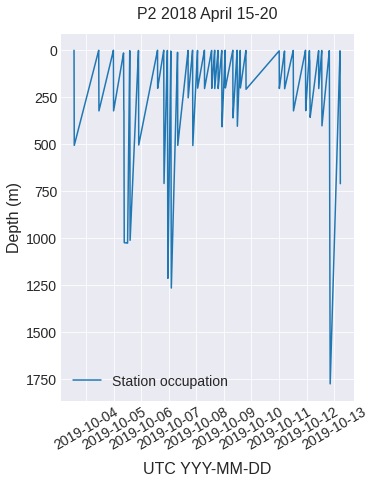

In [57]:
from matplotlib import style

style.use("seaborn-darkgrid")

ax0 = p2_combine["Time"].plot_cast(label='Station occupation')

ax0.grid(True)


ax0.set_xlabel('UTC YYY-MM-DD', fontsize = 16, labelpad = 10)

ax0.set_ylabel('Depth (m)', fontsize = 16)

ax0.tick_params(axis='y', labelsize=14)
ax0.tick_params(axis='x', labelsize=14, rotation = 30)


ax0.legend(loc="lower left", fontsize = 14) 


ax0.set_title('P2 2018 April 15-20', fontsize = 16, pad = 15);
